<a href="https://colab.research.google.com/github/TshidisoKingk/Telco-Customer-Churn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT REQUIRED LIBRARIES**

In [83]:
!pip install pydotplus

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


**LOADING THE DATASET**

In [85]:
df = pd.read_csv('customer_churn.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [86]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


**Exploratory Data Analysis**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [88]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [89]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [90]:
list(df.columns)

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [91]:
df.duplicated().sum()

np.int64(0)

In [92]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [93]:
# Create encoders
le_subscription = LabelEncoder()
le_contract = LabelEncoder()
le_gender = LabelEncoder()

# Encode the columns
df["Subscription_Type_Encoded"] = le_subscription.fit_transform(df["Subscription Type"])
df["Contract_Length_Encoded"] = le_contract.fit_transform(df["Contract Length"])
df["Gender_Encoded"] = le_gender.fit_transform(df["Gender"])

In [94]:
df[["Subscription Type", "Subscription_Type_Encoded"]].head()

,Subscription Type,Subscription_Type_Encoded
0,Basic,0
1,Standard,2
2,Premium,1
3,Premium,1
4,Standard,2


In [95]:
df[["Contract Length", "Contract_Length_Encoded"]].head()

,Contract Length,Contract_Length_Encoded
0,Monthly,1
1,Monthly,1
2,Annual,0
3,Quarterly,2
4,Annual,0


In [96]:
df[["Gender", "Gender_Encoded"]].head()

,Gender,Gender_Encoded
0,Female,0
1,Female,0
2,Male,1
3,Male,1
4,Female,0


In [97]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Subscription_Type_Encoded,Contract_Length_Encoded,Gender_Encoded
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,0,1,0
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,2,1,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,1,0,1
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,1,2,1
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,2,0,0


In [98]:
df["Subscription_Type_Encoded"] = le_subscription.fit_transform(df["Subscription Type"])
df["Contract_Length_Encoded"] = le_contract.fit_transform(df["Contract Length"])
df["Gender_Encoded"] = le_gender.fit_transform(df["Gender"])

df1 = df.drop(["Subscription Type", "Contract Length", "Gender"], axis=1)

In [99]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Subscription_Type_Encoded,Contract_Length_Encoded,Gender_Encoded
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,0,1,0
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,2,1,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,1,0,1
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,1,2,1
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,2,0,0


In [100]:
df1.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Type_Encoded,Contract_Length_Encoded,Gender_Encoded
0,1,22,25,14,4,27,598,9,1,0,1,0
1,2,41,28,28,7,13,584,20,0,2,1,0
2,3,47,27,10,2,29,757,21,0,1,0,1
3,4,35,9,12,5,17,232,18,0,1,2,1
4,5,53,58,24,9,2,533,18,0,2,0,0


**DATA VISUALIZATION**

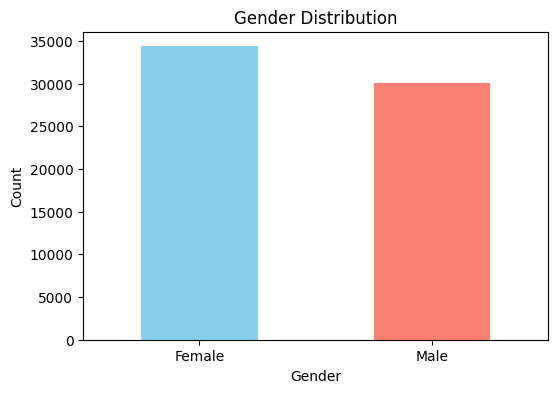

In [108]:
gender_counts = df['Gender'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


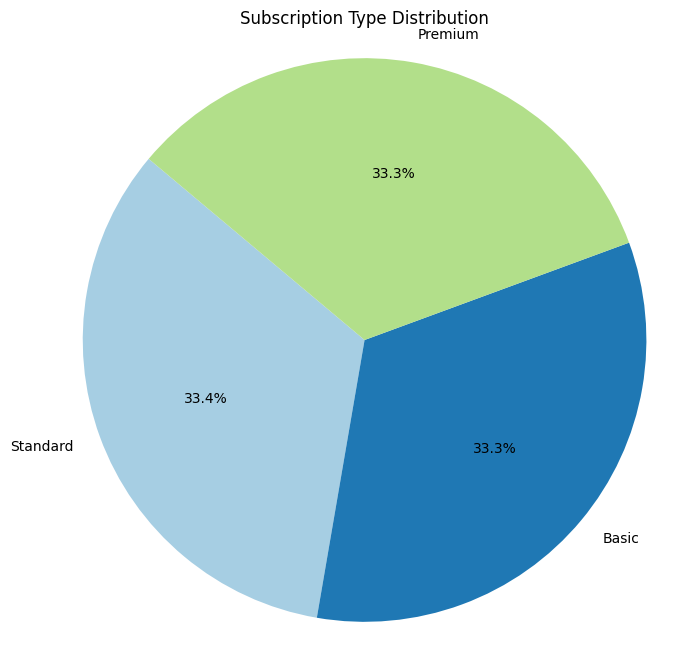

In [109]:
subscription_counts = df['Subscription Type'].value_counts()
labels = subscription_counts.index
sizes = subscription_counts.values

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Subscription Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


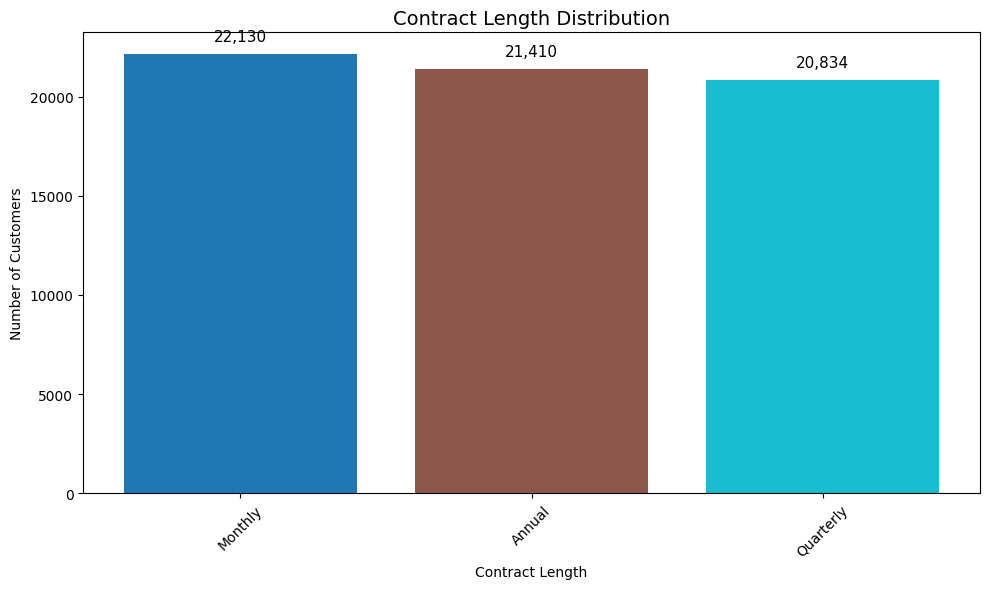

In [117]:
# Clean the data
df['Contract Length'] = df['Contract Length'].astype(str).str.strip()
contract_counts = df['Contract Length'].value_counts()

# Generate unique colors using a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(contract_counts)))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(contract_counts.index, contract_counts.values, color=colors)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height):,}',
             ha='center', va='bottom', fontsize=11)

plt.title('Contract Length Distribution', fontsize=14)
plt.xlabel('Contract Length')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


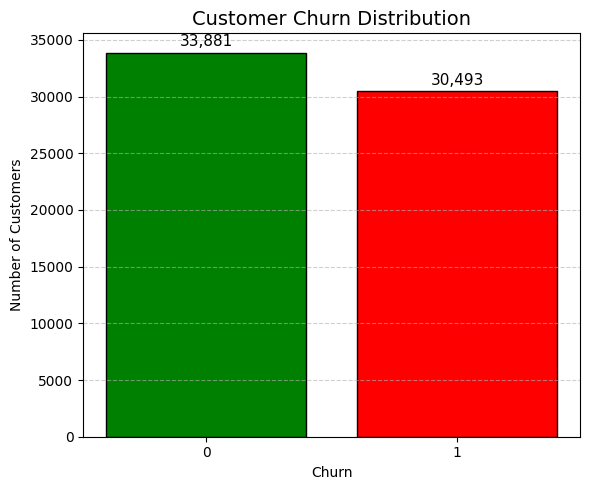

In [120]:

# Count churn values (0 and 1)
churn_counts = df['Churn'].value_counts().sort_index()

# Define readable labels
labels = ['0', '1']

# Plot bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, churn_counts.values, color=['green', 'red'], edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 300, f'{int(height):,}',
             ha='center', va='bottom', fontsize=11)

plt.title('Customer Churn Distribution', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
